
<img src="./figures/cartopy.png" alt="Indentation" width="30%" height="30%">

# Visualisation de fichier Netcdf avec Cartopy 


La librairie Cartopy de python permet de d'analyser, de traiter et de tracer des données géoréférencées avec l'aide de Matplotlib. 


https://scitools.org.uk/cartopy/docs/latest/#



## 1 - Exemple de tracé d'un champs 2D Netcdf

- Nous allons travailler la climatologie (1981-2010) mensuelle de la température minimale journalière
- Dans un premier temps nous allons importer les librairies Python et ouvrir le fichier Netcdf 

La classe Dataset du module netCDF4 permet d'ouvrir et lire les fichiers Netcdf. 
Nous allons ici stocker le fichier Netcdf dans la variable nc_fid.

In [1]:
from netCDF4 import Dataset
import warnings
warnings.filterwarnings("ignore")

filename='./data/ANUSPLIN_NLDAS_10km_CLIMATO_TASMIN_1981_2010_06.nc'
nc_fid=Dataset(filename,'r')
#nc_fid.variables

Lecture de la variable TASMIN que nous souhaitons tracer suivant les coordonnées (lat,lon). 

In [2]:
lats = nc_fid.variables['lat'][:]  # Extrait et copie les données du fichier NetCDF
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
Vals = nc_fid.variables['TASMIN'][:].squeeze() 

On va maintenant appeller les librairies cartopy et  matplotlib de Python pour créer une instance graphique. 
La librairie carto apporte des fonctions pour enrichir visuellement des cartes faites avec cartopy: ajout d'une échelle...

In [3]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from carto import scale_bar

On crée une instance de Cartopy pour créer une carte. On choisit ici notre projection, orientation de grille et couverture totale. 

Voici un lien très utile pour choisir un type de projection: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

Dans cet exemple, nous allons travailler avec une projection dite "LambertConformal".


In [4]:
fig=plt.figure(figsize=(5,3), frameon=True)   
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

On va ajouter quelques produits à notre carte avec nottamment la méthode cartopy.feature de Cartopy: 
https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html


<table border="1" class="docutils">
<colgroup>
<col width="27%">
<col width="57%">
</colgroup>
<tbody valign="top">

<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>BORDERS</b></span></tt></td>
<td>Frontières des pays</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>COASTLINE</b></span></tt></td>
<td>Ajout des côtes </td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>LAKES</b></span></tt></td>
<td>Ajout des lacs</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>LAND</b></span></tt></td>
<td>Continents</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>OCEAN</b></span></tt></td>
<td>Océan</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>RIVERS</b></span></tt></td>
<td>Rivières</td>
</tr>

</tbody>
</table>


On va aussi ajouter les provinces avec la class NaturalEarthFeature de Cartopy:
https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/feature_interface.html#cartopy.feature.NaturalEarthFeature

On travaille ici par ajouts de couches.


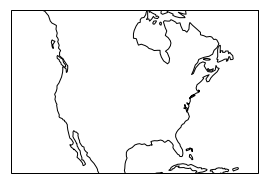

In [5]:
# ajout des côtes:
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
plt.show()


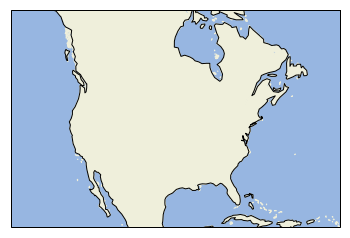

In [6]:
# ajout des continents et des océans:

ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
plt.show()

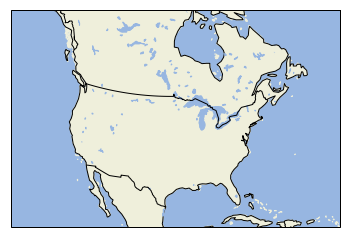

In [7]:
# ajout des lacs et des rivières

ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
plt.show()

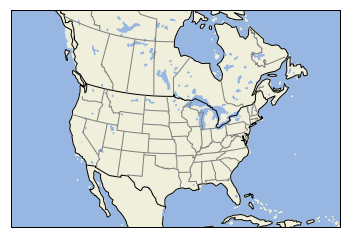

In [8]:
# Ajout des provinces:
# ajout des lacs et des rivières
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
plt.show()

On peut maintenant remplir notre carte avec notre champs géoréférencé avec la méthode pcolormesh de matplotlib:
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html

Ici les coordonnées Lat Lon sont en 2D, donc en chaque point de grille nous connaissons la latitude et la longitude de notre champs.

Il est possible que pour un fichier netcdf les Lat et Lon soient en 1D. On doit alors les écrire en 2D avec la commande suivante: 

    -lon, lat = np.meshgrid(lons, lats)
    
Nous allons aussi produire notre propre palette de couleur. Voici une lien utile pour sélectionner nos couleurs et créer notre palette: http://colorbrewer2.org/#type=diverging&scheme=RdYlBu&n=8 
 
On peut aussi utiliser l'une des palette de couleur prédéfinie par Matplotlip: https://matplotlib.org/examples/color/colormaps_reference.html

On utilera pour tracer notre carte le type pcolormesh  de matplotib. D'autres types de tracés sont mis à disposition: https://matplotlib.org/basemap/users/examples.html 

Pour améliorer la lecture de notre carte, on peut à ce niveau ajouter: 
    - une légende sous la carte: cbar.set_label
    - ajouter un barre de couleur avec un intervalle d'affichage: plt.colorbar

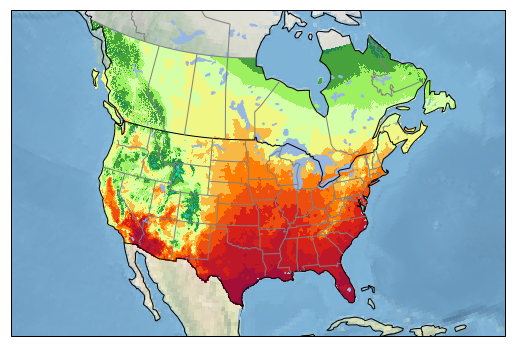

In [9]:
Y=np.array([[77,0,111],[115,14,181],[160,17,222],[195,14,240],\
               [0,0,93],[21,38,177],[33,95,227],[32,162,247],[59,224,248],[202,255,250],\
               [4,255,179],[37,181,139],[32,132,81],[72,162,60],[157,240,96],[213,255,166],\
               [241,247,132],[248,185,68],[255,124,4],[235,78,14],[215,32,24],[189,24,40],[162,16,56],[135,16,65],[107,15,73]])/255.

colbar=mpl.colors.ListedColormap(Y)
fig=plt.figure(figsize=(10,6), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap=colbar )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();
plt.show() 


Si la palette ne convient pas, il est possible d'utiliser une palette de Matplotlib.

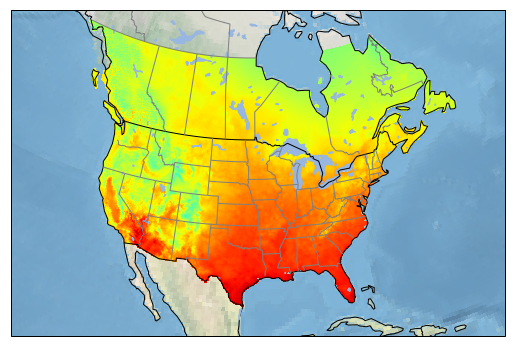

In [10]:
fig=plt.figure(figsize=(10,6), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap='jet' )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();
plt.show() 


On peut finalement ajouter:
    - un titre à notre graphique: plt.title
    - une barre de couleur plt.colorbar
    - un titre à notre barre de couleur: plt.xlabel 
    - les latitudes et longitudes avec la fonction : gridlines()
    - une bar d'échelle: scale_bar()
    
Puis enregistrer notre graphique avec la commande : plt.savefig

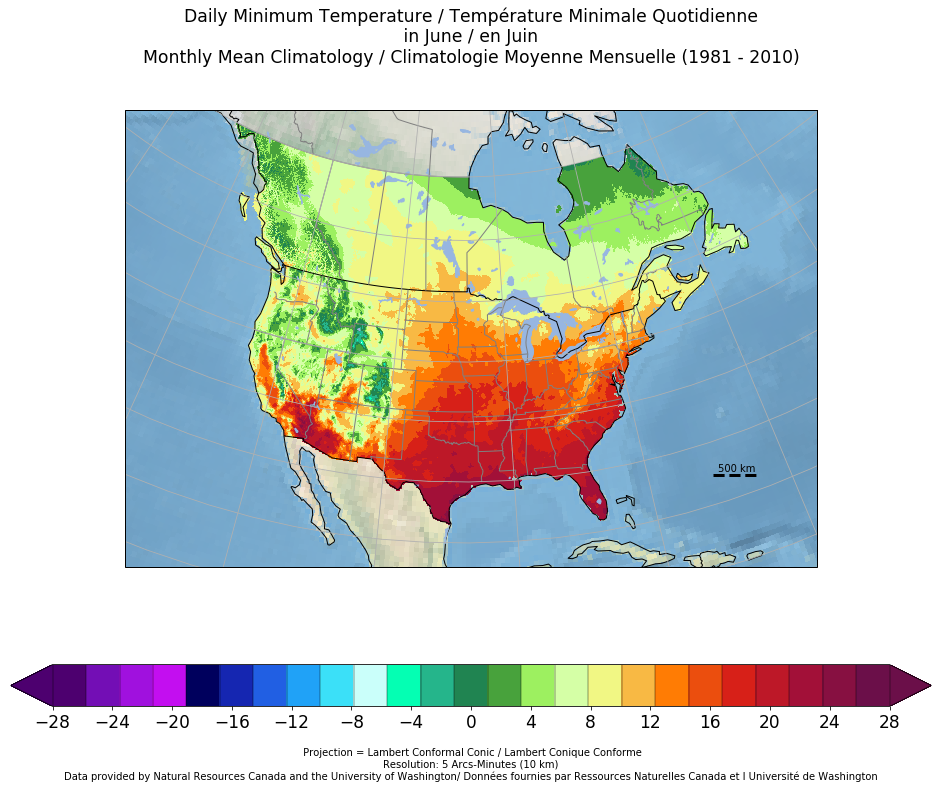

In [11]:
Y=np.array([[77,0,111],[115,14,181],[160,17,222],[195,14,240],\
               [0,0,93],[21,38,177],[33,95,227],[32,162,247],[59,224,248],[202,255,250],\
               [4,255,179],[37,181,139],[32,132,81],[72,162,60],[157,240,96],[213,255,166],\
               [241,247,132],[248,185,68],[255,124,4],[235,78,14],[215,32,24],[189,24,40],[162,16,56],[135,16,65],[107,15,73]])/255.

colbar=mpl.colors.ListedColormap(Y)
fig=plt.figure(figsize=(22,12), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap=colbar )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)
ax.gridlines()

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, orientation='horizontal', shrink=0.75, drawedges='True', ticks=np.arange(-28, 28.1, 4),extend='both')
cbar.set_label(u'\n Projection = Lambert Conformal Conic / Lambert Conique Conforme\nResolution: 5 Arcs-Minutes (10 km)\nData provided by Natural Resources Canada and the University of Washington/ Données fournies par Ressources Naturelles Canada et l Université de Washington', size='medium') # Affichage de la légende de la barre de couleur
cbar.ax.tick_params(labelsize=17) 
 
plt.xlabel(u'\n\n\nTemperature / Température (°C)',size='x-large')
string_title=u'Daily Minimum Temperature / Température Minimale Quotidienne\n in June / en Juin \nMonthly Mean Climatology / Climatologie Moyenne Mensuelle (1981 - 2010)\n\n'
plt.title(string_title, size='xx-large')
plt.savefig('./figures/ANUSPLIN_NLDAS_10km_CLIM_TASMIN_06_1981-2010.png', bbox_inches='tight', pad_inches=0.1)
plt.show() 


## 2 - Autre Exemple de tracé d'un champs 2D Netcdf

- Nous allons travailler la climatologie de l'accumulation mensuelle totale de la précipitation (1981-2010) pour le mois de décembre. 

In [12]:
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from carto import scale_bar

In [13]:
rep_data='./data/'
fic=rep_data+'ANUSPLIN_NLDAS_10km_CLIMATO_PrecTOT_1981_2010_12.nc'
dset=Dataset(fic)

In [14]:
precip=dset.variables['PrecTOT'][:].squeeze()
lon=dset.variables['lon'][:].squeeze()
lat=dset.variables['lat'][:].squeeze()

In [15]:
## Interrogeons un peu chaque variable
print('-----------------------------------------')
print('dimension de precipitation = ',precip.shape)
print('Min de precip est = ', np.nanmin(precip))
print('Max de precip est = ', np.nanmax(precip))
print('-----------------------------------------')
print('-----------------------------------------')
print('dimension de latitude = ',lat.shape)
print('Min de lat est = ', np.min(lat))
print('Max de lat est = ', np.max(lat))
print('-----------------------------------------')
print('-----------------------------------------')
print('dimension de longitude = ',lon.shape)
print('Min de lon est = ', np.min(lon))
print('Max de lon est = ', np.max(lon))
print('-----------------------------------------')

-----------------------------------------
dimension de precipitation =  (1068, 420)
Min de precip est =  2.2327309
Max de precip est =  809.1944
-----------------------------------------
-----------------------------------------
dimension de latitude =  (1068, 420)
Min de lat est =  25.125
Max de lat est =  60.041664
-----------------------------------------
-----------------------------------------
dimension de longitude =  (1068, 420)
Min de lon est =  -140.95833
Max de lon est =  -52.04167
-----------------------------------------


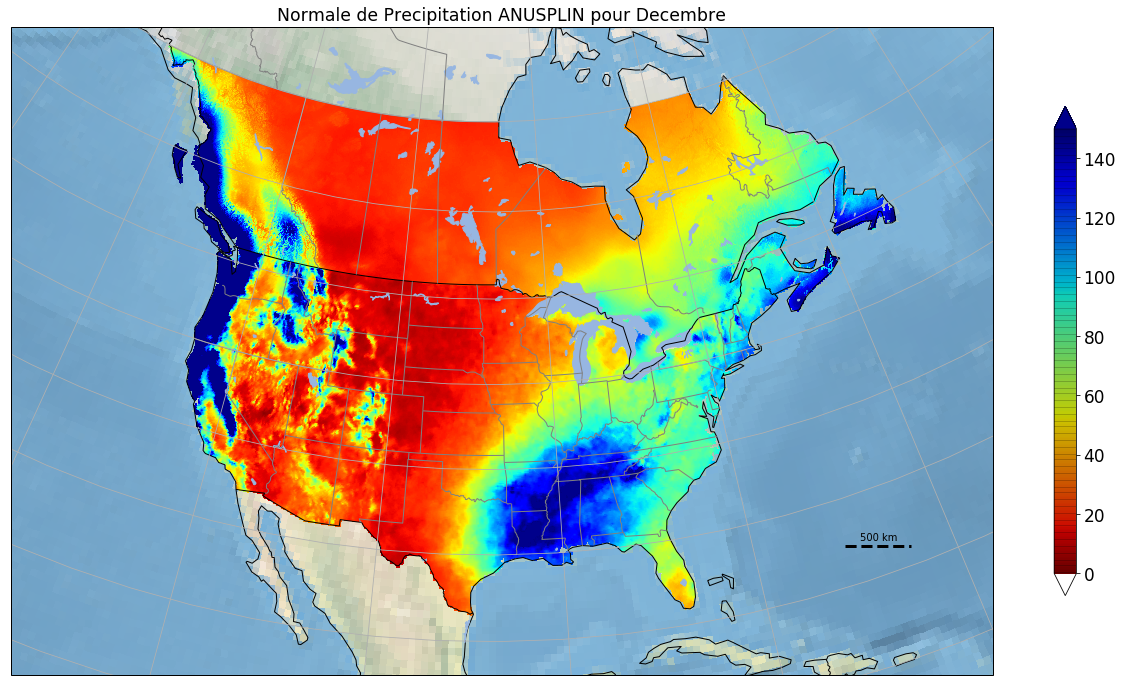

In [16]:
fig = plt.figure(figsize=(22,12))

ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

## Choisissons une colormap
cmap0=plt.cm.jet_r
cmap0.set_under('w') ## on met en blanc les valeurs inferieures au min de clev
cmap0.set_over('darkblue') ## bleu fonce pour les valeurs extremes de pluie

mm = ax.pcolormesh(lon,\
                   lat,\
                   precip,\
                   vmin=0,\
                   vmax=150, \
                   transform=ccrs.PlateCarree(),\
                   cmap=cmap0 )

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();

ax.gridlines()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)

fig.canvas.draw()

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, shrink=0.75, drawedges='True', ticks=np.arange(0, 150.1, 20),extend='both')
cbar.ax.tick_params(labelsize=17) 

plt.xlabel(u'\Precipitation (mm)',size='x-large')
string_title=u'Normale de Precipitation ANUSPLIN pour Decembre'
plt.title(string_title, size='xx-large')
plt.savefig('./figures/My_2Dlalon_plot.png', bbox_inches='tight', pad_inches=0.1)
plt.show()  
plt.close()

## 3 - Exemple de boucle sur les tracés d'un champs 2D Netcdf

- Nous allons travailler les climatologies de l'accumulation mensuelle totale de la précipitation (1981-2010) pour tous les mois de l'année. 

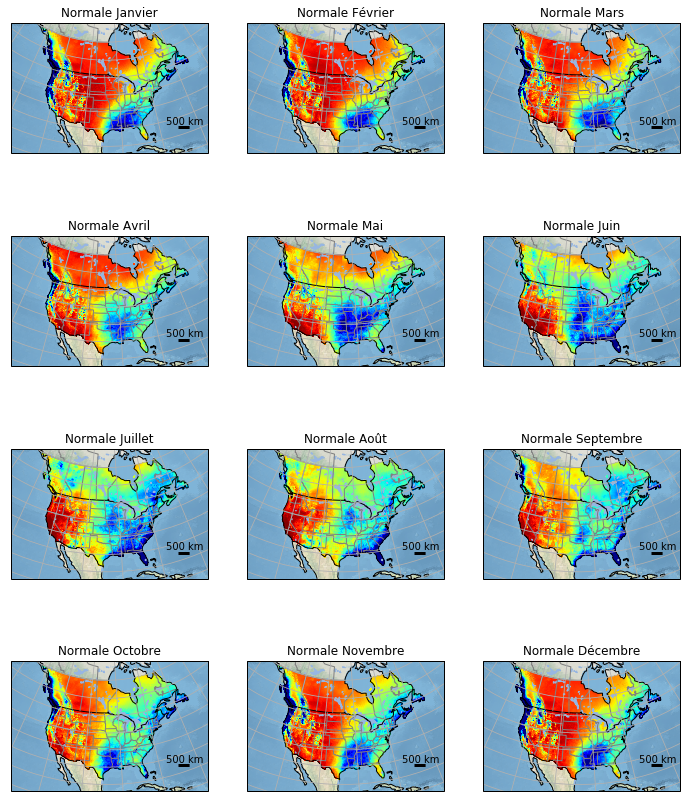

In [18]:
## On va refaire la meme operation mais en allant chercher les donnees pour chaque mois
## et les affichers sur un panel de 12 figures
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from carto import scale_bar

month=np.arange(1,13) ## 12 mois
month_name=["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
nmonth=month.shape[0]
rep_data='./data/'

## On va boucler l'opperation precedente sur 12 mois
fig=plt.figure(figsize=(12,15))
clevs=np.arange(5,150.1,5)
## Choisissons une colormap
cmap0=plt.cm.jet_r
cmap0.set_under('w') ## on met en blanc les valeurs inferieures au min de clev
cmap0.set_over('darkblue')

for imonth in range(nmonth):
    ax=fig.add_subplot(4,3,imonth+1, projection=ccrs.LambertConformal())   
    fic=rep_data+'ANUSPLIN_NLDAS_10km_CLIMATO_PrecTOT_1981_2010_'+str(int(month[imonth])).zfill(2)+'.nc'
    dset=Dataset(fic)
    precip=dset.variables['PrecTOT'][:].squeeze()
    lon=dset.variables['lon'][:].squeeze()
    lat=dset.variables['lat'][:].squeeze()
    
    ax.set_extent([-130,-60,18,62])
    ax.coastlines(resolution='110m');
    ax.add_feature(cfeature.LAND.with_scale('50m'))
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))

    mm = ax.pcolormesh(lon,\
                   lat,\
                   precip,\
                   vmin=0,\
                   vmax=150, \
                   transform=ccrs.PlateCarree(),\
                   cmap=cmap0 )
    plt.title('Normale '+ month_name[imonth],fontsize=12)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    ax.add_feature(states_provinces, edgecolor='gray')  
    ax.stock_img();
    ax.gridlines();
    # Standard 6,000 km scale bar.
    scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

plt.savefig('./figures/My_2Dlalon_multipanel_plot.png')
plt.show()